# Exploración y comparación con las estimaciones del IHME

En este cuaderno se explorarán las series de tiempo de los casos estimados por el IHME y se compararán con las series de los indicadores extraídos de: **GoFundMe**, **Google** y **Twitter**.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
from cycler import cycler

In [73]:
# Para usar el estilo por defecto de seaborn
sns.set(rc={'figure.figsize':(11, 5)})

Cargamos los datos del IHME. Los datos se decargaron de la página de [OurWorldInData](https://ourworldindata.org/grapher/daily-new-estimated-covid-19-infections-ihme-model?country=~VEN) el 11 de mayo de 2021.

In [74]:
df = pd.read_csv('../datos/daily-new-estimated-covid-19-infections-ihme-model.csv', parse_dates = [2])
df_VEN = df[df['Code'] == 'VEN']

df_VEN.head() # visualizamos los datos

,Entity,Code,Day,"Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (IHME, lower)","Daily new estimated infections of COVID-19 (IHME, upper)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"
89592,Venezuela,VEN,2020-02-22,0.000000,0.000000,0.000000,NaN
89593,Venezuela,VEN,2020-02-23,2.840592,0.194467,16.529363,NaN
89594,Venezuela,VEN,2020-02-24,5.537659,0.950555,26.886904,NaN
89595,Venezuela,VEN,2020-02-25,10.045116,2.718426,33.866749,NaN
89596,Venezuela,VEN,2020-02-26,17.572251,5.755914,48.376716,NaN


 ## Series de tiempo de los datos del IHME

Creamos la serie de tiempo:

In [75]:
series_IHME = df_VEN.set_index('Day').iloc[:,2:] #seleccionamos las columnas que nos interesan para 
                                             #construir las series de tiempo
series_IHME.head() #visualicemos el resultado

,"Daily new estimated infections of COVID-19 (IHME, mean)","Daily new estimated infections of COVID-19 (IHME, lower)","Daily new estimated infections of COVID-19 (IHME, upper)","Daily new confirmed cases due to COVID-19 (rolling 7-day average, right-aligned)"
Day,,,,
2020-02-22,0.000000,0.000000,0.000000,NaN
2020-02-23,2.840592,0.194467,16.529363,NaN
2020-02-24,5.537659,0.950555,26.886904,NaN
2020-02-25,10.045116,2.718426,33.866749,NaN
2020-02-26,17.572251,5.755914,48.376716,NaN


Y luego la visualizamos:

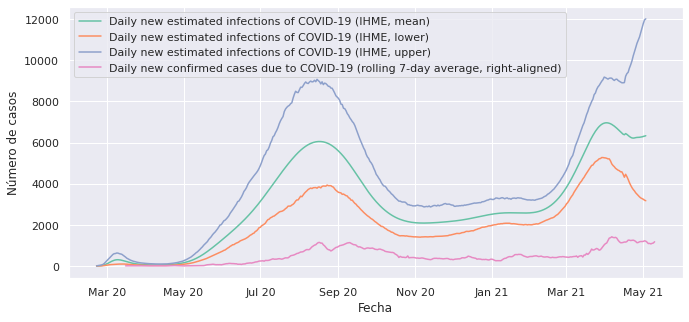

In [84]:
# creamos la figura
fig = plt.figure()
ax = fig.add_subplot(111)

#cambiamos el ciclo de colores
colormap = plt.get_cmap('Set2')
ax.set_prop_cycle(cycler(color = [colormap(k) for k in np.linspace(0, 1, 8)]))

# graficamos los datos del IHME
for columna in series_IHME.columns:
    ax.plot(series_IHME.loc[:, columna], label = columna)

ax.set_ylabel('Número de casos')
ax.set_xlabel('Fecha')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
ax.legend()
plt.show()

## Datos de GoFundMe

In [109]:
# Cargamos todos los datos
df_campañas = pd.read_csv('../datos/GoFundMe_TimeSeries/nuevas_campañas.csv', index_col = 'launch_date', parse_dates = True)
df_costo_total = pd.read_csv('../datos/GoFundMe_TimeSeries/nuevas_campañas_valor_total.csv', 
                          index_col = 'launch_date', parse_dates = True)

#hacemos una lista con estos datos
datos_GoFundMe = [df_campañas, df_costo_total]

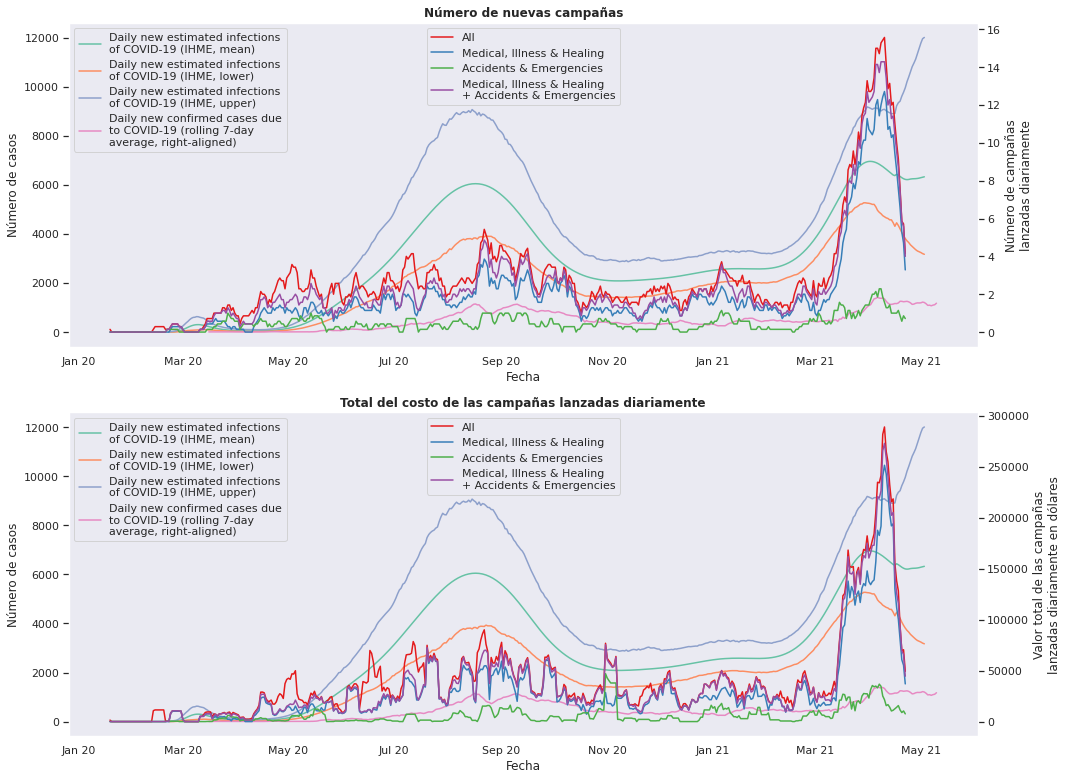

In [118]:
# y graficamos
n = 2
titulos = ['Número de nuevas campañas', 'Total del costo de las campañas lanzadas diariamente']
eje_y = ['Número de campañas\nlanzadas diariamente', 'Valor total de las campañas\nlanzadas diariamente en dólares']

labels_IHME = ['Daily new estimated infections\nof COVID-19 (IHME, mean)', 
               'Daily new estimated infections\nof COVID-19 (IHME, lower)',
               'Daily new estimated infections\nof COVID-19 (IHME, upper)',
               'Daily new confirmed cases due\nto COVID-19 (rolling 7-day\naverage, right-aligned)']

labels_GoFundMe = ['All', 'Medical, Illness & Healing', 'Accidents & Emergencies',
                   'Medical, Illness & Healing\n+ Accidents & Emergencies']


fig, axs = plt.subplots(2, 1, figsize = (15, 11))

for i in range(n):
    ax_left = axs[i]
    ax_right = ax_left.twinx() # creamos el eje gemelo a la derecha

    #cambiamos el ciclo de colores
    colormap1 = plt.get_cmap('Set2')
    ax_left.set_prop_cycle(cycler(color = [colormap1(k) for k in np.linspace(0, 1, 8)]))

    #cambiamos el ciclo de colores
    colormap2 = plt.get_cmap('Set1')
    ax_right.set_prop_cycle(cycler(color = [colormap2(k) for k in np.linspace(0, 1, 9)]))

    # graficamos los datos del IHME
    col_IHME = series_IHME.columns
    for j in range(len(col_IHME)):
        ax_left.plot(series_IHME.loc[:, col_IHME[j]], label = labels_IHME[j])

    # graficamos los datos de GoFund 
    col_GoFundMe = datos_GoFundMe[i].columns
    for j in range(len(col_GoFundMe)):
        ax_right.plot(datos_GoFundMe[i].loc[:, col_GoFundMe[j]], label = labels_GoFundMe[j])
    
    # nos deshacemos de la grilla
    ax_left.grid(False)
    ax_right.grid(False)
    
    # modificamos los títulos y 'labels' de los ejes 
    ax_left.set_title(titulos[i], fontweight = 'bold')
    ax_right.set_ylabel(eje_y[i])
    ax_left.set_ylabel('Número de casos')
    ax_left.set_xlabel('Fecha')
    ax_left.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
    
    # agregamos la leyenda
    ax_left.legend(loc = 'upper left')
    ax_right.legend(loc = 'upper center' )
plt.tight_layout()
plt.show()